# A. Problem Statement

Bank ABC offers home loans. Customers apply for a loan and wait until it is approved successfully.
- The company wants to build a rapid appraisal model based on information provided by customers to save costs.
- The problem is to identify customer segments to speed up the company's workflow

It is a classification problem where we have to predict whether a loan would be approved or not. 
- Determine this is a binary classification problem: yes or no

Hypothesis before going to analyze:
- Financial ability: with the higher the income, the easier it is to repay the bank debt
- Previous loan history: applicants  who have paid their debts before are more likely to gain the trust of the bank
- Loan amount: the smaller the loan, the easier it is to get approved
- Loan term: Loan for less time period and less amount should have higher chances of approval.
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.


# B. Data analysis

## I. Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.shape

(614, 13)

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

- Variable Descriptions:


| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Yes/No)                        	|
| Dependents        	| Number of dependents(1,2,3+)                          	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Yes/No)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|


In [8]:
# drop the columns that are not needed, 'Loan_ID' 
data = data.drop(['Loan_ID'], axis=1)

## II. EDA, Exploratory Data Analysis

### Variable classification

- Categorical data: 
- - Norminal data: Gender, Married, Credit_History,  Loan_Status, Education, Self_Employed, Property_Area
- - Ordinal data:  Dependents, Loan_Amount_Term
- Numerical data:
- - Countinous data: ApplicantIncome, CoapplicantIncome
- - Discrete data: LoanAmount

### Loan profile status

In [9]:
sns.set_style('darkgrid')

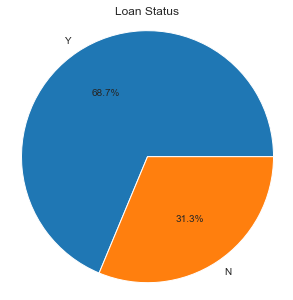

In [10]:
# Loan_Status is the target variable
Loan_Status = data['Loan_Status'].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(Loan_Status, labels=Loan_Status.index, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Loan Status')
plt.show()

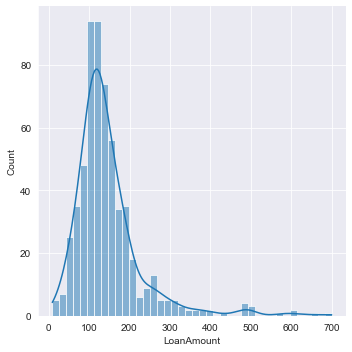

In [11]:
# Histogram of 'Loan_Amount'
sns.displot(data['LoanAmount'], bins=40,kde=True)
plt.show()

- Loan Approval Status: About 2/3rd of applicants have been granted loan.
- Loan Amount: the data is skewed towards one side.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

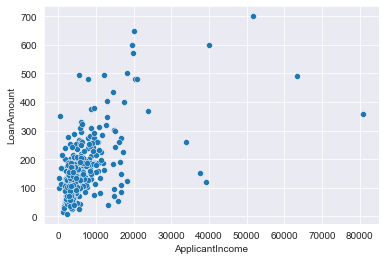

In [12]:
sns.scatterplot(data=data, x='ApplicantIncome', y='LoanAmount')

### Who need a loan?

In [13]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

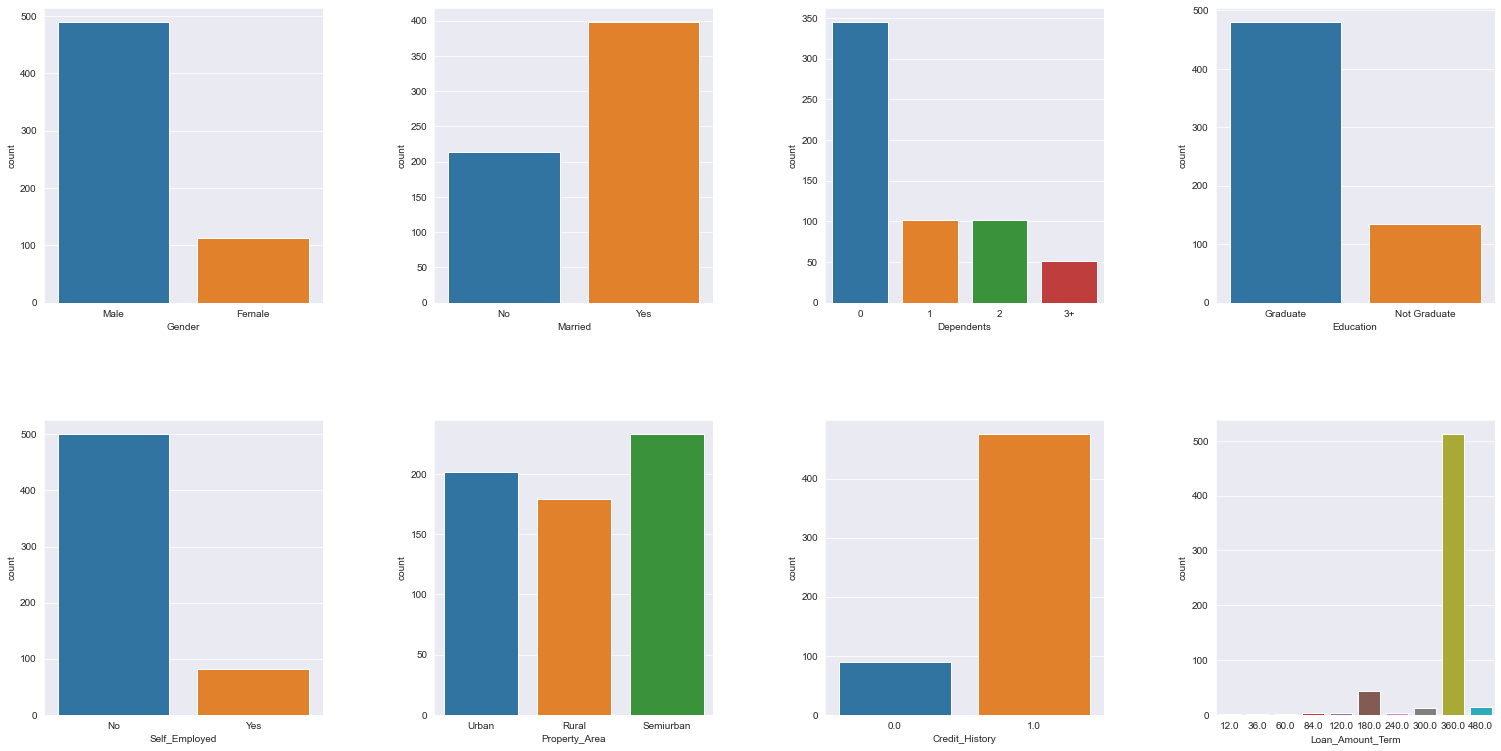

In [14]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize= (26, 13))
for idx,column in enumerate(categorical_columns):
    row,col = idx//4, idx%4
    ax = sns.countplot(x=column, data=data, ax=axs[row,col])
    # ax.bar_label(ax.containers[0])
plt.subplots_adjust(hspace=0.4, wspace=0.4)

Who needs a loan? It's:
- Sex: Man are more than Women
- Martial Status: Married applicants are more likely to be granted loans.
- Dependents: Majority of the population have zero dependents and are also likely to be accepted for loan.
- Education: The population is Graduate and have higher propotion of loan approval
- Employment: It seems that self-employed people need a loan
- Property Area: More applicants from Semi-urban and also likely to be granted loans
- Credit History: Applicant with credit history are far more likely to be accepted
- Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

### Is "who are you" the deciding factor?

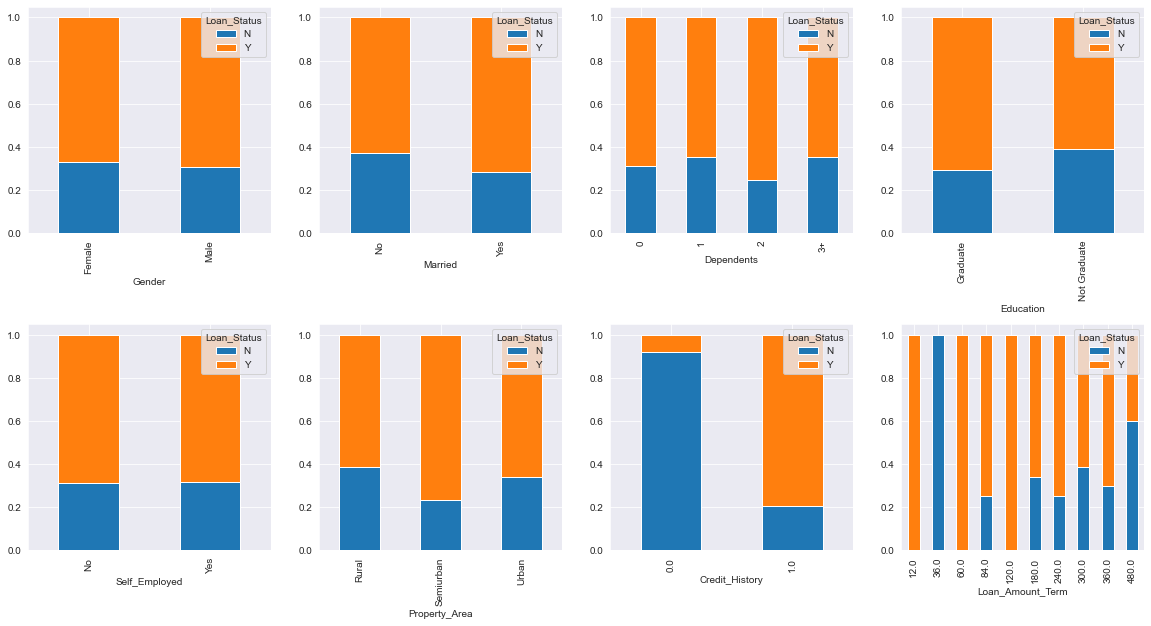

In [15]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
for idx,column in enumerate(categorical_columns):
    row,col = idx//4, idx%4
    df = pd.crosstab(data[column], data['Loan_Status'])
    df.div(df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axs[row,col])
plt.subplots_adjust(hspace=0.4, wspace=0.2)    

There are 2 factors that strongly influence the loan approval: Credit History and Loan Amount Term
- Credit History: Having a credit history is a plus
- Loan Amount Term: Most applications for a long term loan of 360 months are approved successfully

### Financial ability

In [16]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
data[numerical_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


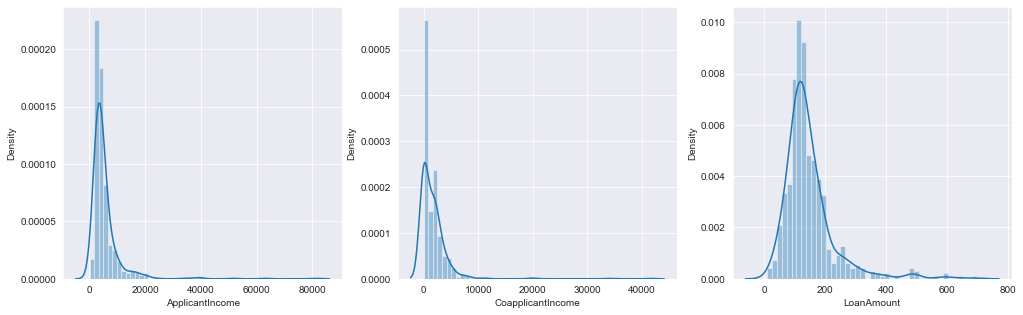

In [17]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.distplot(data[cat_col], ax=axes[idx])
plt.subplots_adjust(hspace=1)   

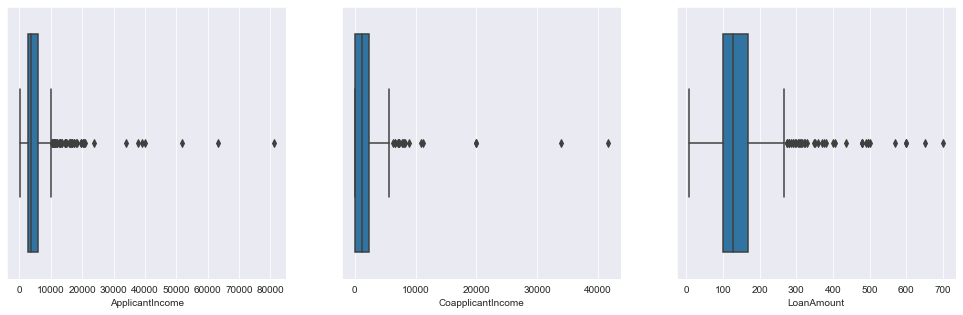

In [18]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(x=cat_col,data=data,ax=axes[idx])
plt.subplots_adjust(hspace=1)

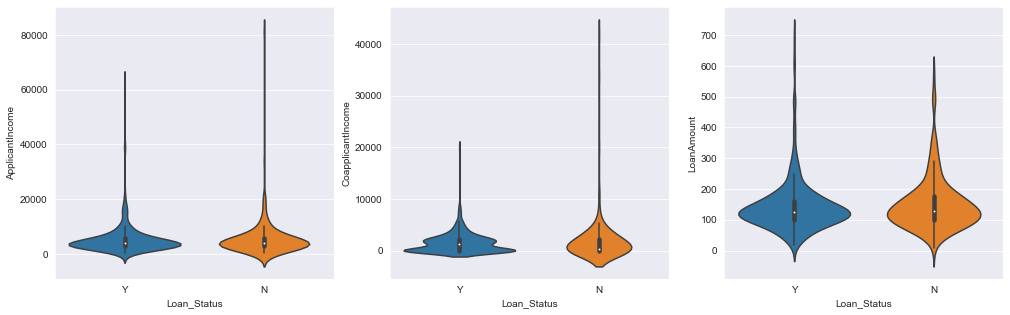

In [19]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.violinplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])
plt.subplots_adjust(hspace=1)

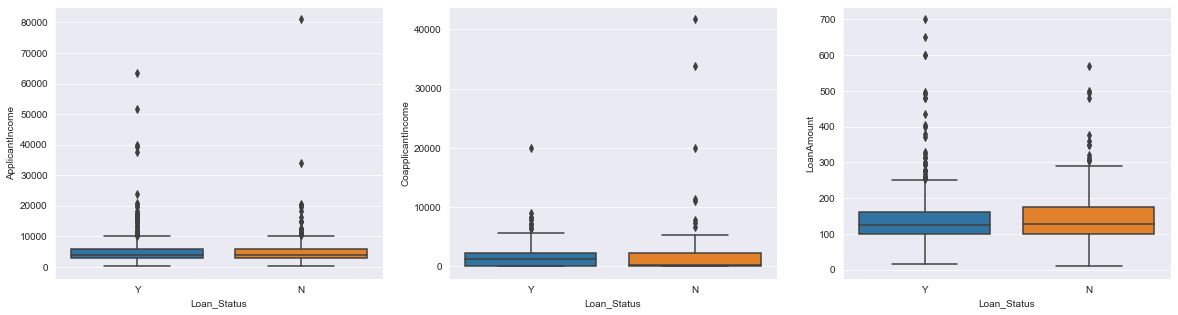

In [20]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])
plt.subplots_adjust(hspace=1)

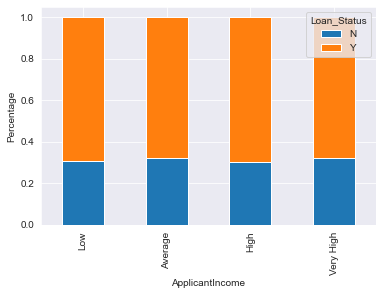

In [21]:
# Considering the applicant's income, divide it 
bins=[0,2900,3800,5800,81000] 
group=['Low','Average','High','Very High']
Income_bin = pd.cut(data['ApplicantIncome'], bins,labels=group)
Income_bin = pd.crosstab(Income_bin,data['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

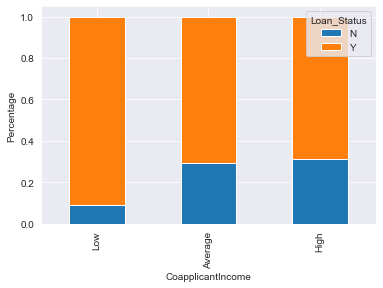

In [22]:
# By the total income of the co-applicant
bins=[0,1200,2300,42000]
group=['Low','Average','High',]
Coapplicant_Income_bin = pd.cut(data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(Coapplicant_Income_bin,data['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

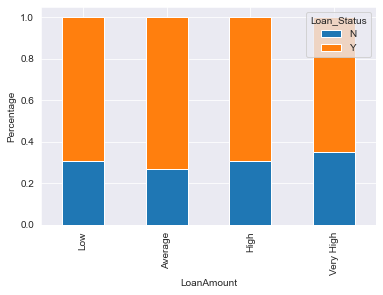

In [23]:
# by the loan amount
bins=[0,100,130,170,700] 
group=['Low','Average','High','Very High']
LoanAmount_bin = pd.cut(data['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(LoanAmount_bin,data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

- It can be seen that the 3 factors: applicant's income, co-applicant, loan amount do not affect too much the chances of getting a loan approved.
- This seems to contradict the original hypothesis.

### Correlation

In [24]:
correlation_data = data.corr()

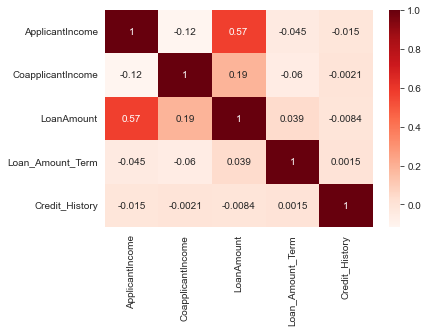

In [25]:
sns.heatmap(correlation_data, annot=True, cmap=plt.cm.Reds)
plt.show()

There is a positive correlation between ApplicantIncome and LoanAmount

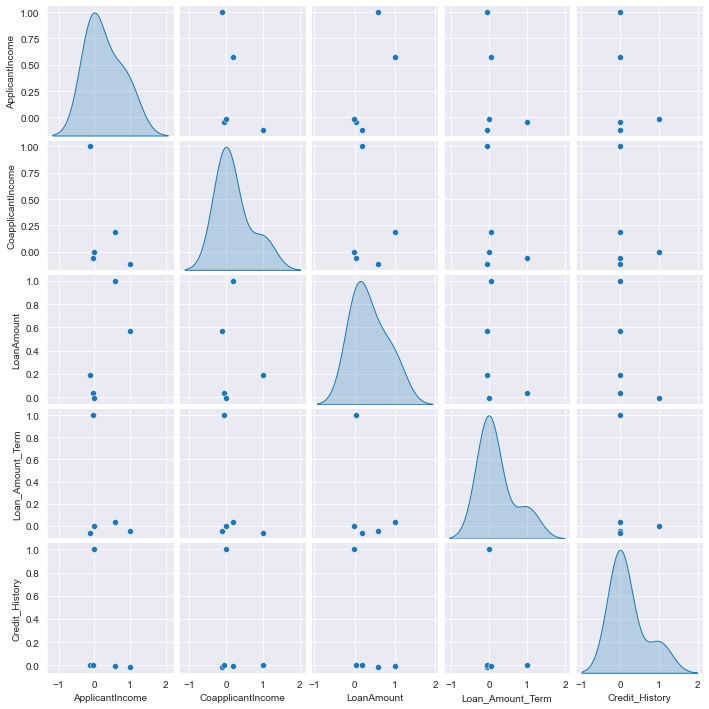

In [26]:
sns.pairplot(correlation_data, diag_kind="kde", size=2)
plt.show()

### Hypothesis_Testing_Chi_Square_Statistics 

In [27]:
# The chi-square test is a non-parametric statistical test.
# The chi-square test is used to test the independence of two or more categorical variables
from scipy import stats
from scipy.stats import chi2_contingency

In [28]:
# H0:There is no relationship between feature x and feature y
# H1:There is a relationship between feature x and feature y
def test_hypothesis(feature_x, feature_y):
    """
    Test the hypothesis that feature_x and feature_y are independent
    """
    contingency_table = pd.crosstab(data[feature_x], data[feature_y])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    alpha = 0.05
    print('Observed Contingency Table:')
    print(contingency_table)
    print('Observed Value:')
    print(contingency_table.values)
    print('Expected Contingency Table:')
    print(expected)
    print("The degree of freedom is: %d" % dof)
    print("The chi-square test statistic is: %f" % chi2)
    print("Critical value is: %f" % stats.chi2.ppf(q = 1 - alpha, df = dof))
    print("The p-value is: %f" % p)
    print("The significant level is: " + str(alpha))
    if p < alpha:
        print("p < alpha")
        print("We reject the null hypothesis")
        print("There is a relationship between " + feature_x + " and " + feature_y)
    else:
        print("p > alpha")
        print("We cannot reject the null hypothesis")
        print("There is no relationship between " + feature_x + " and " + feature_y)

In [29]:
test_hypothesis('Gender', 'Loan_Status')

Observed Contingency Table:
Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
Observed Value:
[[ 37  75]
 [150 339]]
Expected Contingency Table:
[[ 34.84858569  77.15141431]
 [152.15141431 336.84858569]]
The degree of freedom is: 1
The chi-square test statistic is: 0.139626
Critical value is: 3.841459
The p-value is: 0.708653
The significant level is: 0.05
p > alpha
We cannot reject the null hypothesis
There is no relationship between Gender and Loan_Status


In [32]:
test_hypothesis('Property_Area', 'Loan_Status')

Observed Contingency Table:
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
Observed Value:
[[ 69 110]
 [ 54 179]
 [ 69 133]]
Expected Contingency Table:
[[ 55.97394137 123.02605863]
 [ 72.85993485 160.14006515]
 [ 63.16612378 138.83387622]]
The degree of freedom is: 2
The chi-square test statistic is: 12.297623
Critical value is: 5.991465
The p-value is: 0.002136
The significant level is: 0.05
p < alpha
We reject the null hypothesis
There is a relationship between Property_Area and Loan_Status


In [33]:
test_hypothesis('Credit_History', 'Loan_Status')

Observed Contingency Table:
Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
Observed Value:
[[ 82   7]
 [ 97 378]]
Expected Contingency Table:
[[ 28.2464539  60.7535461]
 [150.7535461 324.2464539]]
The degree of freedom is: 1
The chi-square test statistic is: 174.637297
Critical value is: 3.841459
The p-value is: 0.000000
The significant level is: 0.05
p < alpha
We reject the null hypothesis
There is a relationship between Credit_History and Loan_Status


In [34]:
test_hypothesis('Education', 'Loan_Status')

Observed Contingency Table:
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Observed Value:
[[140 340]
 [ 52  82]]
Expected Contingency Table:
[[150.09771987 329.90228013]
 [ 41.90228013  92.09771987]]
The degree of freedom is: 1
The chi-square test statistic is: 4.091490
Critical value is: 3.841459
The p-value is: 0.043100
The significant level is: 0.05
p < alpha
We reject the null hypothesis
There is a relationship between Education and Loan_Status


In [35]:
test_hypothesis('Dependents', 'Loan_Status')

Observed Contingency Table:
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
Observed Value:
[[107 238]
 [ 36  66]
 [ 25  76]
 [ 18  33]]
Expected Contingency Table:
[[107.12854758 237.87145242]
 [ 31.67278798  70.32721202]
 [ 31.36227045  69.63772955]
 [ 15.83639399  35.16360601]]
The degree of freedom is: 3
The chi-square test statistic is: 3.158340
Critical value is: 7.814728
The p-value is: 0.367851
The significant level is: 0.05
p > alpha
We cannot reject the null hypothesis
There is no relationship between Dependents and Loan_Status


In [36]:
test_hypothesis('Self_Employed', 'Loan_Status')

Observed Contingency Table:
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
Observed Value:
[[157 343]
 [ 26  56]]
Expected Contingency Table:
[[157.21649485 342.78350515]
 [ 25.78350515  56.21649485]]
The degree of freedom is: 1
The chi-square test statistic is: 0.000000
Critical value is: 3.841459
The p-value is: 1.000000
The significant level is: 0.05
p > alpha
We cannot reject the null hypothesis
There is no relationship between Self_Employed and Loan_Status


In [37]:
test_hypothesis('Married', 'Loan_Status')

Observed Contingency Table:
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
Observed Value:
[[ 79 134]
 [113 285]]
Expected Contingency Table:
[[ 66.93289689 146.06710311]
 [125.06710311 272.93289689]]
The degree of freedom is: 1
The chi-square test statistic is: 4.475019
Critical value is: 3.841459
The p-value is: 0.034394
The significant level is: 0.05
p < alpha
We reject the null hypothesis
There is a relationship between Married and Loan_Status


## III. Data processing

### Missing value

In [38]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
#Calculate the percentage of missing values
(data.isnull().sum()/data.count())*100

Gender               2.163062
Married              0.490998
Dependents           2.504174
Education            0.000000
Self_Employed        5.498282
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.716216
Loan_Amount_Term     2.333333
Credit_History       8.865248
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [40]:
# handle missing values
# categorical data, ordinal data, fill with mode
data.Gender.fillna(data.Gender.mode()[0], inplace= True)
data.Married.fillna(data.Married.mode()[0], inplace= True)
data.Dependents.fillna(data.Dependents.mode()[0], inplace= True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0], inplace= True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace= True)
data.Credit_History.fillna(data.Credit_History.mode()[0], inplace= True)
# numerical data, continuous data, fill with median
data.LoanAmount.fillna(data.LoanAmount.median(), inplace= True)
# median is better than mean in this data as the data is skewed towards one side that was visualized earlier

### Feature engineering

In [41]:
# Create a new column for TotalIncome
# Total Income: combine the applicant income and co-applicant income. If the total income is high, chances of loan approval might also be high.
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

In [42]:
# EMI, Equated monthly installments to be paid back
# Monthly Installment: estimate the monthly payment that the borrower has to make towards the loan.
# That people who have high EMI's might find difficult to pay back the loan. We can calculate the EMI by taking ratio of the loan amount with respect to the loan amount term.
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']

In [43]:
data[['TotalIncome','EMI']].describe()

,TotalIncome,EMI
count,614.000000,614.000000
mean,7024.705081,0.473687
std,6458.663872,0.511134
min,1442.000000,0.025000
25%,4166.000000,0.288889
50%,5416.500000,0.361111
75%,7521.750000,0.505556
max,81000.000000,9.250000


In [44]:
# Drop the columns which are not required, they are have high correlation with the new feature TotalIncome, EMI
data = data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [45]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI
0,Male,No,0,Graduate,No,1.0,Urban,Y,5849.0,0.355556
1,Male,Yes,1,Graduate,No,1.0,Rural,N,6091.0,0.355556
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,0.183333
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4941.0,0.333333
4,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,0.391667


In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data[['TotalIncome', 'EMI']])

In [47]:
# One-hot-encode the categorical columns.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

df = data.drop(['TotalIncome', 'EMI','Loan_Status'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


In [48]:


categorical_cols = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Credit_History', 'Property_Area'] 

from sklearn.compose import make_column_transformer
columns_transform = make_column_transformer((ohe,['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Credit_History', 'Property_Area']),
                                           remainder='passthrough')
array_hot_encoded=columns_transform.fit_transform(df)

In [49]:
#Convert it to df
new_columns = ['Gender_Male', 'Gender_Female', 'Married_No','Married_Yes','Dependents_0','Dependents_1','Dependents_2','Dependents_3+',
                'Education_Grad', 'Education_Graduate_NotGrad','Self_Employed_No','Self_Employed_Yes', 'Credit_History_0','Credit_History_1',
                'Property_Area_Rural','Property_Area_Semiurban','Property_Area_Urban']
data_hot_encoded = pd.DataFrame(array_hot_encoded, columns = new_columns)

In [50]:
data_hot_encoded.head()

,Gender_Male,Gender_Female,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Grad,Education_Graduate_NotGrad,Self_Employed_No,Self_Employed_Yes,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [51]:
#Extract only the columns that didnt need to be encoded
data_other_cols = data.drop(columns=categorical_cols)

In [52]:
#Concatenate the two dataframes : 
data = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [53]:
data.head()

,Gender_Male,Gender_Female,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Grad,Education_Graduate_NotGrad,Self_Employed_No,Self_Employed_Yes,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,TotalIncome,EMI
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Y,5849.0,0.355556
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,N,6091.0,0.355556
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Y,3000.0,0.183333
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Y,4941.0,0.333333
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Y,6000.0,0.391667


## IV. Modeling

### Logistic Model

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [55]:
logreg = LogisticRegression()
X = data.drop(['Loan_Status'],axis=1)
y = data['Loan_Status']
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [56]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (491, 19)
y_train.shape: (491,)
X_test.shape: (123, 19)
y_test.shape: (123,)


In [57]:
print(y_pred)

['Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y']


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy Score: 0.7804878048780488
Logistic Regression Confusion Matrix: 
 [[16 22]
 [ 5 80]]


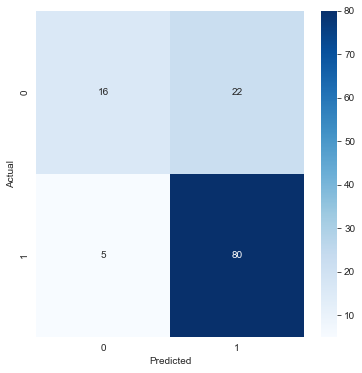

In [59]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['0', '1'], yticklabels=['0', '1'],
            cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.76      0.42      0.54        38
           Y       0.78      0.94      0.86        85

    accuracy                           0.78       123
   macro avg       0.77      0.68      0.70       123
weighted avg       0.78      0.78      0.76       123



In [61]:
from sklearn.preprocessing import LabelEncoder
y_test_label = LabelEncoder().fit_transform(y_test)
y_pred_label = LabelEncoder().fit_transform(y_pred)

In [62]:
# Check the AUC score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_true=y_test_label, y_score=y_pred_label)
print("AUC :", auc_score)

AUC : 0.6811145510835913


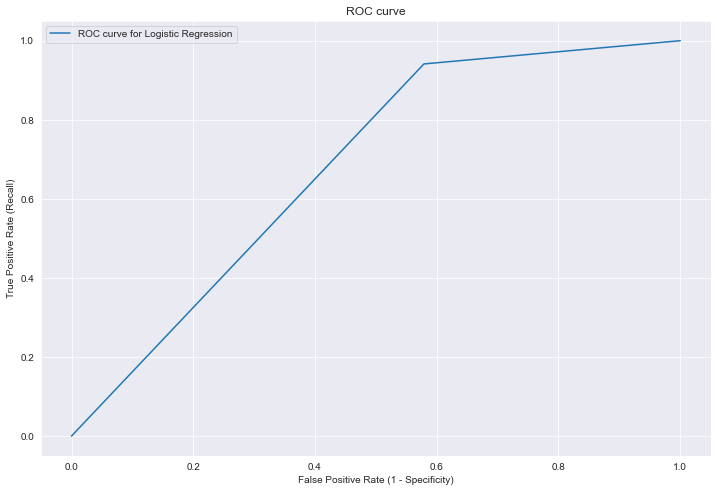

In [63]:
# Check the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_label, y_pred_label)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [64]:
# Weighted of features
print('intercept (w_0) =', logreg.intercept_)
print('weights   (w_1 to w_n):', logreg.coef_)

intercept (w_0) = [-0.06303449]
weights   (w_1 to w_n): [[-2.83013803e-03 -6.70827352e-02 -3.75348871e-01  3.05435998e-01
  -1.19422987e-01 -1.68480421e-01  1.99020553e-01  1.89699826e-02
   2.25764259e-01 -2.95677131e-01 -1.37690704e-01  6.77778303e-02
  -1.80640438e+00  1.73649151e+00 -4.91286336e-01  6.76851158e-01
  -2.55477695e-01 -2.66157382e-05 -1.05250040e-01]]


In [65]:
weights_df = pd.DataFrame(
    data=logreg.coef_.T,
    columns=['weight'], 
    index=X.columns
).reset_index().rename(columns={'index':'feature_names'})

weights_df.head()

,feature_names,weight
0,Gender_Male,-0.002830
1,Gender_Female,-0.067083
2,Married_No,-0.375349
3,Married_Yes,0.305436
4,Dependents_0,-0.119423


In [66]:
weights_df['abs_weight'] = weights_df['weight'].abs()
weights_df = weights_df.sort_values(by='abs_weight', ascending=False)
weights_df.head(10)

,feature_names,weight,abs_weight
12,Credit_History_0,-1.806404,1.806404
13,Credit_History_1,1.736492,1.736492
15,Property_Area_Semiurban,0.676851,0.676851
14,Property_Area_Rural,-0.491286,0.491286
2,Married_No,-0.375349,0.375349
3,Married_Yes,0.305436,0.305436
9,Education_Graduate_NotGrad,-0.295677,0.295677
16,Property_Area_Urban,-0.255478,0.255478
8,Education_Grad,0.225764,0.225764
6,Dependents_2,0.199021,0.199021


### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="gini",random_state=10,max_depth=3,min_samples_leaf=5)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [68]:
print("Training Accuracy:{:.3f}".format(dtree.score(X_train,y_train)))
print('Testing Accuracy:{:.3f}'.format(dtree.score(X_test,y_test)))

Training Accuracy:0.823
Testing Accuracy:0.805


In [69]:
print(confusion_matrix(y_test, y_pred))

[[17 21]
 [ 3 82]]


### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5, criterion='gini', random_state=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [71]:
print("Training Accuracy:{:.3f}".format(rfc.score(X_train,y_train)))
print('Testing Accuracy:{:.3f}'.format(rfc.score(X_test,y_test)))

Training Accuracy:0.965
Testing Accuracy:0.715


In [72]:
print(confusion_matrix(y_test, y_pred))

[[20 18]
 [17 68]]


## V. Conclusions

Through descriptive analysis, shows:
 - Customer's desired loan term is 360 months = 30 years
 - Number 1: Credit History is extremely important, people with credit history will have easier access to loans
 - The second factor: Rural and semi-urban areas are the areas that are approved for a lot of loans
 - The financial situation is not as important as the assumption, instead the bank based on its credit history is probably safer
 - The next important factors: Dependen = 1, Married = No, Education = Not Graduate indicate these are young people

From the above factors, we can imagine a group of opponents with high demand for loans to buy houses:
 - Characteristics 1: rejuvenation
 - Characteristics 2: population movement: from rural, semi-urban to urban to buy house
 - Characteristics 3: inability to make large payments, want to extend the loan period
 - Characteristics 4: have a reliable credit history

# C. Some ideals

Suppose, a bank operating in the field of home loans, besides relying on the model built from the above data set to approve the loan, can also build some more policies based on the characteristics of the loan customer group:
- Designing product packages aimed at young people, low-income people, can be combined with government policies. For example, in Vietnam, the government has both a preferential loan policy for low-income people and a policy to encourage real estate businesses to build low-cost houses.
- The desired loan term is mostly very long, the bank can offer a reasonable and long-term interest rate to the customer, together with the customer, plan a suitable, solid, safe and sustainable repayment plan.

Note
- This is a small practice exercise with a set of hypothetical data, so there are definitely many shortcomings.
- Any suggestions are welcome
